In [5]:
import numpy as np
from networkx.generators.community import LFR_benchmark_graph
import matplotlib.pyplot as plt

In [6]:
n = 1000
tau1 = 2
tau2 = 1.05
mu = 0.1
G = LFR_benchmark_graph(n, tau1, tau2, mu, average_degree=5,min_community=40, seed=11, max_iters=50)

In [7]:
communities = {frozenset(G.nodes[v]['community']) for v in G}
print(communities)

{frozenset({514, 138, 651, 140, 908, 142, 529, 661, 149, 918, 536, 161, 39, 689, 946, 183, 73, 847, 339, 851, 981, 344, 216, 858, 859, 860, 612, 230, 105, 235, 495, 369, 242, 373, 634, 379, 764, 125, 254, 127}), frozenset({11, 269, 534, 26, 282, 804, 293, 38, 43, 53, 59, 573, 61, 88, 863, 864, 100, 101, 868, 358, 362, 111, 880, 884, 117, 885, 889, 123, 639, 130, 648, 392, 906, 143, 911, 400, 403, 404, 663, 408, 924, 157, 670, 413, 412, 929, 418, 163, 421, 423, 424, 427, 940, 941, 429, 434, 435, 948, 436, 439, 954, 187, 444, 957, 445, 704, 448, 450, 966, 967, 457, 973, 980, 469, 985, 480, 481, 738, 483, 998, 500, 508}), frozenset({384, 2, 131, 645, 518, 12, 528, 145, 531, 405, 664, 793, 409, 155, 285, 160, 672, 292, 805, 812, 173, 686, 304, 307, 180, 58, 831, 329, 203, 460, 206, 729, 220, 735, 225, 227, 236, 628, 246, 633, 250}), frozenset({6, 548, 51, 75, 592, 594, 85, 603, 605, 606, 94, 609, 613, 620, 622, 626, 630, 632, 637, 126, 642, 643, 644, 133, 649, 653, 657, 159, 162, 675, 676,

In [8]:
len(communities)

12

In [9]:
import networkx as nx

In [10]:
g_array = nx.to_numpy_array(G)

In [11]:
np.set_printoptions(threshold=100)

In [12]:
g_array

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [13]:
np.random.rand()

0.019110094637419417

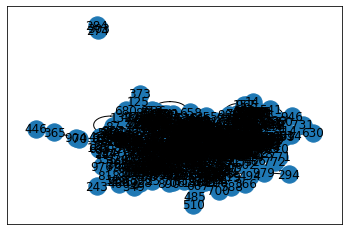

In [14]:
nx.draw_networkx(G)

In [15]:
G = np.zeros((500, 500))

In [16]:
for i in range(500):
    for j in range(i, 500):
        if j <= i+10:
            if np.random.rand() < 3/10:
                G[i][j] = np.random.randn()
                G[j][i] = np.random.randn()
        else:
            if np.random.rand() < 3/490:
                G[i][j] = np.random.randn()
                G[j][i] = np.random.randn()

In [17]:
G=nx.from_numpy_matrix(G)

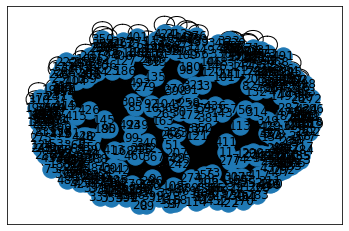

In [18]:
nx.draw_networkx(G)

In [107]:
def make_modular_network(N, average_degree, community_number, mu):
    assert N % community_number == 0, 'N must be devisible by community_number'
    G = np.zeros((N, N))
    for i in range(N):
        for j in range(i, N):
            if j <= i+(N/community_number):
                if np.random.rand() < average_degree*(1-mu)/(N/community_number):
                    G[i][j] = np.random.randn()
                    G[j][i] = np.random.randn()
            else:
                if np.random.rand() < average_degree*(mu)/(N-(N/community_number)):
                    G[i][j] = np.random.randn()
                    G[j][i] = np.random.randn()
    return G

In [108]:
G_array = make_modular_network(100, 2, 2, 0.1)

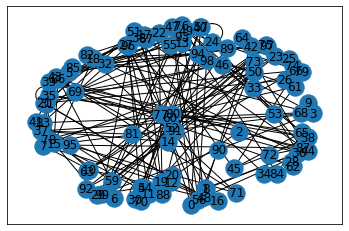

In [109]:
G=nx.from_numpy_matrix(G_array)
nx.draw_networkx(G)

In [22]:
def make_layered_network(N, average_degree, community_number, mu):
    assert N % community_number == 0, 'N must be devisible by community_number'
    size = N/community_number
    G = np.zeros((N, N))
    for i in range(N):
        com_index = i//size
        k_in_prev = 0
        k_out_prev = 0
        for j in range(int(size*com_index)):
            if G[i][j] != 0:
                k_out_prev += 1
        for j in range(int(size*com_index), int(size*(com_index+1))):
            if G[i][j] != 0:
                k_in_prev += 1
        for j in range(i, N):
            if j < size*((i//size)+1):
                if int(com_index) == 0 or int(com_index) == community_number-1:
                    if np.random.rand() < (average_degree*(1-(mu*0.5))-k_in_prev)/(size-(i-(size*com_index))+1):
                        G[i][j] = 1
                        G[j][i] = 1
                else:
                    if np.random.rand() < (average_degree*(1-mu)-k_in_prev)/(size-(i-(size*com_index))+1):
                        G[i][j] = 1
                        G[j][i] = 1
            elif j < size*((i//size)+2):
                if int(com_index) == 0 or int(com_index) == community_number-1:
                    if np.random.rand() < (average_degree*(mu*0.5)-k_out_prev)/size:
                        G[i][j] = 1
                        G[j][i] = 1
                else:
                    if np.random.rand() < (average_degree*(mu)-k_out_prev)/size:
                        G[i][j] = 1
                        G[j][i] = 1
                    
    return G

In [149]:
def make_modular_network(N, average_degree, community_number, mu):
    assert N % community_number == 0, 'N must be devisible by community_number'
    G = np.zeros((N, N))
    size = N/community_number
    for i in range(N):
        com_index = i//size
        k_in_prev = 0
        k_out_prev = 0
        for j in range(int(size*com_index)):
            if G[i][j] != 0:
                k_out_prev += 1
        for j in range(int(size*com_index), int(size*(com_index+1))):
            if G[i][j] != 0:
                k_in_prev += 1
        for j in range(i, N):
            if j < size*((i//size)+1):
                if np.random.rand() < (average_degree*(1-mu)-k_in_prev)/(size-(i-(size*com_index))+1):
                    G[i][j] = 1
                    G[j][i] = 1
            else:
                if np.random.rand() < (average_degree*(mu)-k_out_prev)/(N-(size*((i//size)+1))+1):
                    G[i][j] = 1
                    G[j][i] = 1
    return G

In [150]:
G_array = make_modular_network(200, 10, 2, 0.15)
G=nx.from_numpy_matrix(G_array) 

In [151]:
G.degree() # 打印每个节点的度为多少

DegreeView({0: 14, 1: 16, 2: 8, 3: 10, 4: 6, 5: 7, 6: 13, 7: 7, 8: 7, 9: 18, 10: 13, 11: 8, 12: 3, 13: 6, 14: 11, 15: 10, 16: 15, 17: 9, 18: 12, 19: 12, 20: 7, 21: 7, 22: 14, 23: 11, 24: 16, 25: 10, 26: 12, 27: 15, 28: 9, 29: 10, 30: 13, 31: 9, 32: 10, 33: 12, 34: 11, 35: 11, 36: 10, 37: 10, 38: 10, 39: 5, 40: 10, 41: 12, 42: 8, 43: 12, 44: 10, 45: 7, 46: 13, 47: 9, 48: 12, 49: 9, 50: 10, 51: 8, 52: 10, 53: 11, 54: 10, 55: 11, 56: 9, 57: 10, 58: 10, 59: 10, 60: 12, 61: 8, 62: 13, 63: 9, 64: 10, 65: 7, 66: 9, 67: 13, 68: 10, 69: 9, 70: 11, 71: 11, 72: 9, 73: 11, 74: 7, 75: 11, 76: 10, 77: 9, 78: 10, 79: 8, 80: 13, 81: 9, 82: 11, 83: 10, 84: 10, 85: 11, 86: 9, 87: 9, 88: 11, 89: 10, 90: 12, 91: 8, 92: 12, 93: 10, 94: 9, 95: 11, 96: 11, 97: 10, 98: 20, 99: 9, 100: 14, 101: 9, 102: 8, 103: 10, 104: 5, 105: 9, 106: 11, 107: 8, 108: 5, 109: 10, 110: 9, 111: 14, 112: 9, 113: 17, 114: 9, 115: 12, 116: 8, 117: 6, 118: 9, 119: 10, 120: 5, 121: 9, 122: 11, 123: 9, 124: 7, 125: 10, 126: 10, 127: 6

In [152]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)

In [153]:
print(degree_sequence)
print(len(degree_sequence)) # 结点个数

[20, 18, 17, 16, 16, 16, 15, 15, 14, 14, 14, 14, 14, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 5, 5, 5, 5, 3]
200


In [154]:
np.mean(degree_sequence) # 结点的平均度

10.06

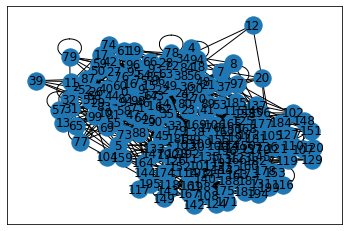

In [155]:
nx.draw_networkx(G)

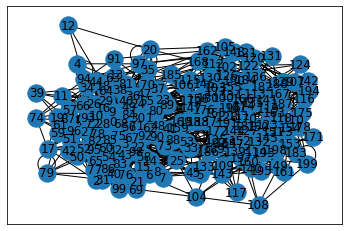

In [156]:
nx.draw_networkx(G)

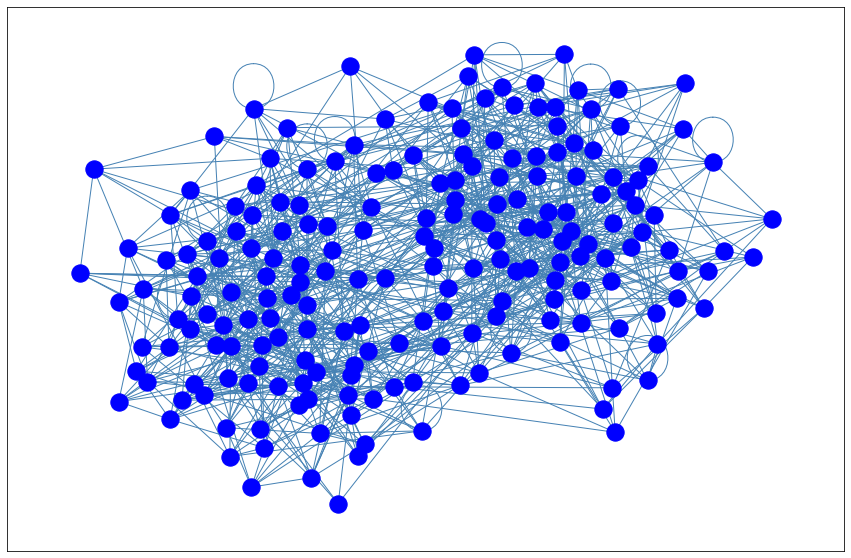

In [171]:
G_array = make_modular_network(200, 10, 2, 0.15)
G=nx.from_numpy_matrix(G_array)
# レイアウトの取得
pos = nx.spring_layout(G)

# 可視化
plt.figure(figsize=(15, 10))
nx.draw_networkx_edges(G, pos, edge_color="steelblue")
nx.draw_networkx_nodes(G, pos, node_color="blue")
plt.axis('on')
plt.savefig('normal_modularity_0.15.png', dpi=100)

number of edges:1000


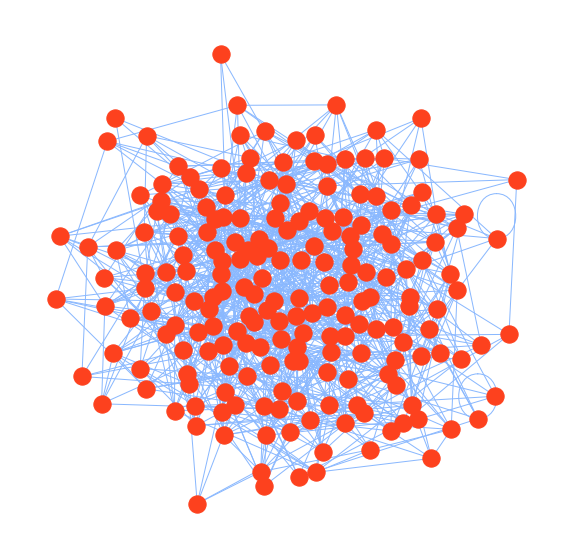

In [169]:
N_NODES = 200
W = np.ones((N_NODES*N_NODES))
tmp = np.random.choice(N_NODES**2, 1000, replace=False) # 从NODES**2中随机抽取1000个置边，其它无边
mask = [False if i in tmp else True for i in range(N_NODES**2)]
mask = np.array(mask)
W[mask] = 0
W = W.reshape(N_NODES, N_NODES)
# 计算总边数
res = 0
for i in range(W.shape[0]):
    for j in range(W.shape[1]):
        if W[i][j] == True:
            res += 1
print("number of edges:{0}".format(res)) 

radius = np.max(np.abs(np.linalg.eigvals(W)))

G=nx.from_numpy_matrix(W)
pos = nx.spring_layout(G)

# 可視化
plt.figure(figsize=(10, 10))
nx.draw_networkx_edges(G, pos, edge_color="#8ab8fe")
nx.draw_networkx_nodes(G, pos, node_color="#fd411e")
plt.axis('off')
plt.savefig('normal_sparse.png', dpi=300)

In [32]:

def make_recurrent_layered_network(N, average_degree, community_number, mu):
    assert N % community_number == 0, 'N must be devisible by community_number'
    size = N / community_number
    G = np.zeros((N, N))
    for i in range(N):
        com_index = i // size
        k_in_prev = 0
        k_out_prev = 0
        for j in range(int(size * com_index)):
            if G[i][j] != 0:
                k_out_prev += 1
        for j in range(int(size * com_index), int(size * (com_index + 1))):
            if G[i][j] != 0:
                k_in_prev += 1
        for j in range(i, N):
            if j < size * ((i // size) + 1):
                if int(com_index) == 0 or int(com_index) == community_number - 1:
                    if np.random.rand() < (average_degree * (1 - (mu * 0.5)) - k_in_prev) / (
                            size - (i - (size * com_index)) + 1):
                        G[i][j] = 1
                        G[j][i] = 1
                else:
                    if np.random.rand() < (average_degree * (1 - mu) - k_in_prev) / (
                            size - (i - (size * com_index)) + 1):
                        G[i][j] = 1
                        G[j][i] = 1
            elif j < size * ((i // size) + 2):
                if int(com_index) == 0 or int(com_index) == community_number - 1:
                    if np.random.rand() < (average_degree * (mu * 0.5) - k_out_prev) / size:
                        G[i][j] = 1
                        G[j][i] = 1
                else:
                    if np.random.rand() < (average_degree * (mu) - k_out_prev) / size:
                        G[i][j] = 1
                        G[j][i] = 1

    return G

In [33]:
G_array = make_recurrent_layered_network(200, 10, 4, 0.05)
G=nx.from_numpy_matrix(G_array)

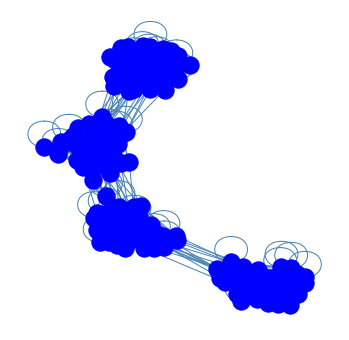

In [34]:

# レイアウトの取得
pos = nx.spring_layout(G)

# 可視化
plt.figure(figsize=(6, 6))
nx.draw_networkx_edges(G, pos, edge_color="steelblue")
nx.draw_networkx_nodes(G, pos, node_color="blue")
plt.axis('off')
plt.savefig('layered_network.png')

In [35]:
import seaborn as sns
# G_array = make_modular_network(200, 10, 4, 0.05)
plt.figure()
sns.heatmap(W)
plt.savefig('sparse.png', dpi=300)
plt.close('all')

In [36]:
nx.average_clustering(G)

0.15657629870129866

<AxesSubplot:>

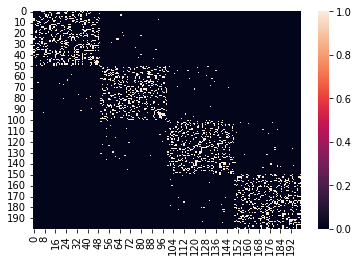

In [37]:
import seaborn as sns
sns.heatmap(G_array)

In [38]:
G_smallworld = nx.watts_strogatz_graph(128, k=16, p=0.01)
degree_sequence = sorted([d for n, d in G_smallworld.degree()], reverse=True)
print(degree_sequence)
print(np.mean(degree_sequence))

[17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 15, 15, 15, 15, 15, 15, 15, 15, 14]
16.0


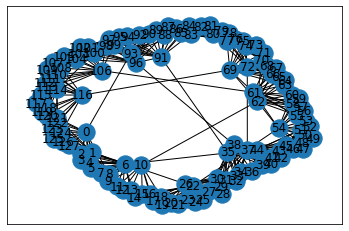

In [39]:
nx.draw_networkx(G_smallworld)

In [40]:
W = nx.to_numpy_array(G_smallworld)

<AxesSubplot:>

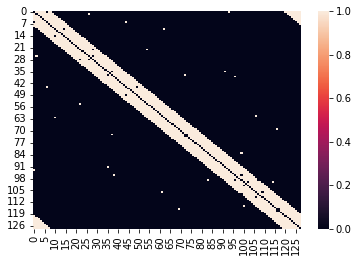

In [41]:
sns.heatmap(W)

In [42]:
J_strogatz_wattz = np.zeros((128,128))

In [43]:
# for i in range(128):
#     for j in range()

In [44]:
nx.average_clustering(G_smallworld)

0.6743807739441938

In [48]:
G_array = make_modular_network(128, 16, 2, 0.1)
G=nx.from_numpy_matrix(G_array)
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
print(degree_sequence)
print(np.mean(degree_sequence))

[22, 22, 22, 21, 21, 21, 21, 20, 20, 20, 20, 20, 20, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 18, 18, 18, 18, 18, 18, 18, 18, 18, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 13, 13, 13, 13, 13, 13, 13, 12, 12, 12, 12, 12, 12, 12, 12, 12, 11, 11, 11, 11, 11, 11, 10, 9]
15.953125


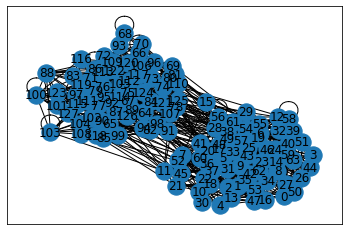

In [49]:
nx.draw_networkx(G)

<AxesSubplot:>

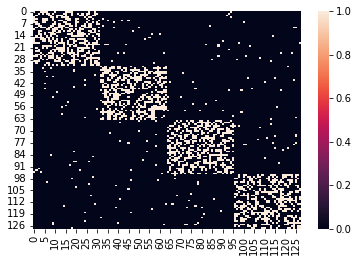

In [47]:
import seaborn as sns
sns.heatmap(G_array)